In [23]:
#Python Library for Dataframe usage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Serializing to a file
import _pickle as pickle

#Libraries for Graph
import networkx as nx

#etc. 
from collections import Counter

In [5]:
#Opening the pickled file
#Needs to be opened in the recommender folder
pickle_in = open("./data/graph/molecule_full_graph.pickle","rb")

#Getting the dictionary from the pickle
pickled_G = pickle.load(pickle_in)

#Converting a dictionary of dictionaries to a graph
G = pickled_G

In [10]:
print("Number of edges: ", G.number_of_edges())

Number of edges:  58970


In [11]:
print("Number of nodes: ", G.number_of_nodes())

Number of nodes:  2591


In [28]:
#returns a dictionary based on attributes
ingredient_node_attribute = nx.get_node_attributes(G, 'ingredient_node')
molecule_node_attribute = nx.get_node_attributes(G, 'molecule_node')

In [29]:
#list of ingredients
ingredient_list = []
for node, boolean in ingredient_node_attribute.items():    
    if boolean == True:
        ingredient_list.append(node)

#list of non ingredients
molecule_list = []
for node, boolean in molecule_node_attribute.items():   
    if boolean == True:
        molecule_list.append(node)

degree of all nodes:

In [45]:
degree_dict = dict(G.degree())
degree_series = pd.Series(degree_dict)
degree_series.describe()

count    2591.000000
mean       45.519105
std        83.994615
min         1.000000
25%         2.000000
50%         7.000000
75%        53.000000
max       614.000000
dtype: float64

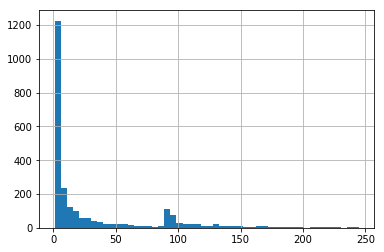

In [52]:
degree_series[degree_series < 250].hist(bins=50)

In [54]:
ingredient_centrality = []
for tup in Counter(nx.degree_centrality(G)).most_common():
    if tup[0] in ingredient_list:
        ingredient_centrality.append(tup)
print("Ingredients with highest centrality: ")
print(ingredient_centrality)

Ingredients with highest centrality: 
[('Tea', 0.15096525096525096), ('Apple', 0.11583011583011583), ('Cocoa', 0.11351351351351352), ('Tomato', 0.10463320463320464), ('Coffee', 0.10386100386100386), ('Beer', 0.10154440154440154), ('Grape', 0.10077220077220077), ('Guava', 0.1), ('Strawberry', 0.09922779922779923), ('Potato', 0.09806949806949807), ('Ginger', 0.09652509652509653), ('Orange', 0.0945945945945946), ('Papaya', 0.09305019305019305), ('Mango', 0.0918918918918919), ('Spearmint', 0.09111969111969112), ('Passionfruit', 0.08764478764478764), ('Mushroom', 0.08764478764478764), ('Peppermint', 0.08725868725868725), ('White Wine', 0.08687258687258687), ('Soybean', 0.08687258687258687), ('Pepper', 0.08571428571428572), ('Pineapple', 0.08494208494208494), ('Capsicum', 0.08416988416988416), ('Celery', 0.08378378378378379), ('Black Currant', 0.08223938223938224), ('Peanut', 0.08185328185328185), ('Basil', 0.0806949806949807), ('Beef Processed', 0.0806949806949807), ('Laurel', 0.08030888030

In [55]:
molecule_centrality = []
for tup in Counter(nx.degree_centrality(G)).most_common():
    if tup[0] in molecule_list:
        molecule_centrality.append(tup)
molecule_centrality
print("Molecules with highest centrality: ")
print(molecule_centrality)

Molecules with highest centrality: 
[('CID 644104', 0.23706563706563707), ('thiamine', 0.2), ('2-Phenylethanol', 0.177992277992278), ('Isobutyraldehyde', 0.1749034749034749), ('3-Methyl-1-butanol', 0.17297297297297298), ('phenylacetaldehyde', 0.17027027027027028), ('betaine', 0.1694980694980695), ('3-Methylbutanal', 0.16833976833976833), ('Phenethyl acetate', 0.16795366795366795), ('2,3-butanedione', 0.1667953667953668), ('Octanal', 0.16563706563706562), ('Propionaldehyde', 0.16525096525096525), ('indole', 0.1640926640926641), ('4-hydroxybenzaldehyde', 0.16332046332046332), ('2-Methylbutyraldehyde', 0.16177606177606177), ('Hexanal', 0.1613899613899614), ('methanethiol', 0.16061776061776062), ('3-methylthiopropanol', 0.16061776061776062), ('vanillin', 0.15945945945945947), ('3-(Methylthio)propionaldehyde', 0.15907335907335907), ('salicylic acid', 0.1583011583011583), ('cis-3-Hexenyl acetate', 0.15675675675675677), ('Geraniol', 0.1555984555984556), ('6-Methyl-5-Hepten-2-One', 0.154826254

In [38]:
print("Connected components: ", nx.number_connected_components(G))

Connected components:  3


In [40]:
for comp in nx.connected_components(G):
    print(comp)

{'3-Hexenal', '2-oxobutanoic acid', 'CID 12305247', 'Japanese Whisky', '19322-27-1', 'Calcium Oxide', 'Kiwifruit', '6,10,14-Trimethylpentadecan-2-one', 'S-Methyl thioacetate', 'Ethyl Acrylate', 'Black raspberry', '19872-52-7', 'Methyl 2-(methylamino)benzoate', '3,3-Dimethylcyclohexanol', 'Angelic acid', 'Banana', 'Eicosane', 'Gelatin', 'Ginger', 'Tea leaf willow', '3-methylthiopropanol', '5,6,7,8-Tetrahydroquinoxaline', '2,6-Dimethyl-5-heptenal', 'Gruyere Cheese', 'Citronellyl isobutyrate', '1-Furfurylpyrrole', 'Dicyclohexyl ketone', 'Florida pompano', 'cis-Cinnamic acid', 'Ethyl palmitoleate', 'D-Limonene', 'phenylacetaldehyde', 'Colocasia', 'Tangeretin', '2-Hexenyl propanoate', '2,6-Dimethoxyphenol', '(E)-2-Hexenyl hexanoate', 'Safflower', '2-Methylbutanoic acid', 'Benzothiazole', 'Ethyl Sorbate', 'Sapodilla', "Elliott's blueberry", 'Cycloionone', 'Jasmine Oil', 'benzaldehyde', 'Orange Oil', 'Butyl Benzoate', 'Bornyl Isovalerate', 'Bison', 'Ethyl Levulinate', 'Macaroni', 'beta-Chamig

Out of the three connected components, two are:
- {'Oxacycloheptadec-7-en-2-one', 'Muskmallow'}
- {'Cinnamyl cinnamate', 'Storax'}

The rest are all connected together

In [41]:
nx.betweenness_centrality(G)

{'Egg': 0.0005177065475331551,
 '3-Methylbutanal': 0.008525902405166106,
 'phenylacetaldehyde': 0.011071422462422065,
 'L-histidine': 0.00039016304172676425,
 '2-Methylpyrazine': 0.00040094418701473874,
 'Pyrrole': 0.0003025924940881562,
 'Pyridine': 0.0008693039360408539,
 '1-Undecanol': 0.00012318080284694054,
 'm-cresol': 7.621543115808334e-05,
 'Dimethyl disulfide': 0.0010904365889877303,
 '3-(Methylthio)propionaldehyde': 0.006588216086739877,
 '1-Octen-3-Ol': 0.003064443186223357,
 '4-Methyl-2-pentanone': 0.0005594161154647394,
 'Propionaldehyde': 0.010540549072058062,
 'indole': 0.009763916751929308,
 '2-Pentylfuran': 0.001351845382638146,
 'Dl-Phenylalanine': 0.000872998284551382,
 'isopropanol': 0.000686444877994782,
 'Octan-2-one': 0.001212010803817097,
 '1-octanol': 0.002941238118861004,
 'Nonanal': 0.004908685282514677,
 'phenol': 0.0014449194347952298,
 'Methyl butyrate': 0.0008147307239331673,
 '2-Pentanone': 0.000977199679747981,
 'Tiglic aldehyde': 0.0006227756711775952,

In [56]:
nx.eigenvector_centrality(G)

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')